仓库地址：https://github.com/lijie0610/data_mining/tree/Clustering

# 数据集
## 选择Hotel booking demand数据集进行分析
## 数据集查看
查看其属性值及前五列数据

In [1]:
import numpy as np
import pandas as pd
import os
dataset=pd.read_csv(r'D:\Users\Desktop\data\hotel_booking_demand\hotel_bookings.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [2]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 数据预处理
## 查看缺失值，并对缺失值进行处理

In [3]:
dataset.isnull().sum()[dataset.isnull().sum()!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

children、country、agent、company四个字段存在缺失值
children:为空值很可能意味着没有children，考虑用0来填充
country：选取用众数来填充
agent:缺失值猜测是因为非机构预订客户，为个人客户，用0填充
company:缺失值较多，且信息较杂，考虑删除该列

In [4]:
dataset['children']=dataset['children'].fillna(0)
dataset['agent']=dataset['agent'].fillna(0)
dataset.drop('company', axis=1, inplace=True)
dataset['country']=dataset['country'].fillna(dataset['country'].mode().index[0])

In [5]:
dataset.isnull().sum()[dataset.isnull().sum()!=0]

Series([], dtype: int64)

查看删除后数据属性值描述

In [6]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# 基本情况：城市酒店和假日酒店预订需求和入住率比较；

bookings_demand:
 City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64
Hotel_occupancy:
 [0.5827303668221354, 0.7223664503245132]


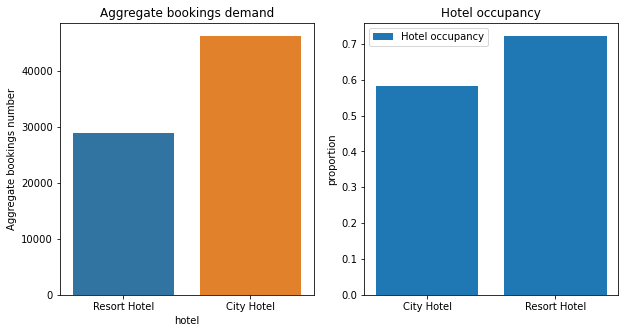

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
bookings_demand=dataset.loc[dataset['is_canceled']==0]#预定需求，未取消订单总量视为预定需求
check_out=dataset.loc[dataset['reservation_status']=='Check-Out']#退房数量视为入住数量
Hotel_occupancy=list(check_out.hotel.value_counts()/dataset['hotel'].value_counts())#入住率计算
print("bookings_demand:\n",bookings_demand.hotel.value_counts())
print("Hotel_occupancy:\n",Hotel_occupancy)
fig,axes=plt.subplots(1,2,figsize=(10,5))
ax1=sns.countplot(x='hotel',data=bookings_demand,ax=axes[0])
ax2=plt.bar([1,2],Hotel_occupancy,tick_label=["City Hotel","Resort Hotel"],label="Hotel occupancy")#城市酒店和假日酒店比较
ax1.set_title('Aggregate bookings demand')#预定需求
ax1.set_ylabel('Aggregate bookings number')
plt.title('Hotel occupancy')#入住率
plt.ylabel('proportion')
plt.legend()

将未取消订单视为预定需求，将退房的数量视为入住数量进行统计分析；城市酒店的总预定需求高于度假酒店，差不多是度假酒店的1.6倍，但是入住率较低。

# 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况

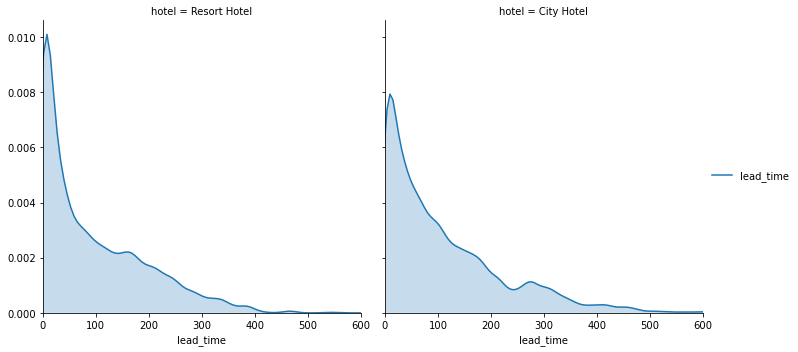

In [8]:
#提前预定时间，预定间隔
ax=sns.FacetGrid(dataset,col='hotel',height=5,xlim=(0,600))
ax.map(sns.kdeplot,'lead_time',shade = True)
ax.add_legend()

大部分集中在50天以内提前预定，城市酒店和度假酒店情况类似。

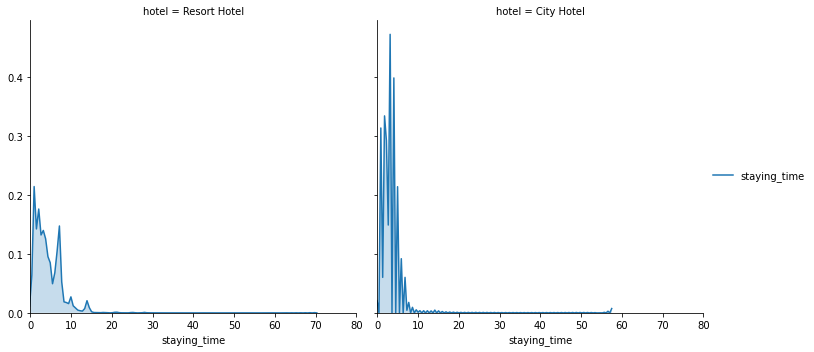

In [9]:
#入住时长
#总居住天数=工作日居住天数+周末居住天数
dataset['staying_time']=dataset['stays_in_weekend_nights']+dataset['stays_in_week_nights']
ax=sns.FacetGrid(dataset,col='hotel',height=5,xlim=(0,80))
ax.map(sns.kdeplot,'staying_time',shade = True)
ax.add_legend()

将工作日居住天数和周末居住天数的和视为入住时长,可以看出大部分均为10天之内。度假酒店入住时长会较多，考虑到客户大多来度假，入住时长会较长。

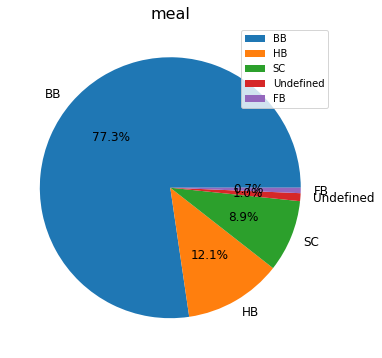

In [10]:
#餐盒预定情况
meal_booking=dataset['meal'].value_counts()
plt.figure(figsize=(14, 6))
plt.pie(meal_booking,labels=meal_booking.index,autopct="%.1f%%",textprops={'fontsize': 12})
plt.title('meal',fontsize=16) #BB：仅早餐；HB：早餐+晚餐；FB：三餐；SC：无餐食预订
plt.legend()

绝大多数客户均选择只预定早餐。

# 一年中最佳预订酒店时间；

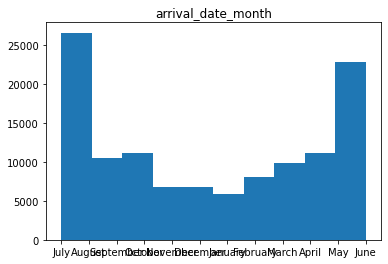

In [11]:
plt.plot()
plt.hist(dataset['arrival_date_month'])
plt.title('arrival_date_month')
plt.show()

可以看出八九月预定人数较多，可以选择在十一月到一月预定酒店。

# 利用Logistic预测酒店预订

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
#选择'required_car_parking_spaces','lead_time','booking_changes','adr','adults'作为特征属性
df_new = dataset.copy()[['required_car_parking_spaces','lead_time','booking_changes','adr','adults', 'is_canceled']]
#以订单的取消情况作为预测对象
X = df_new.drop(['is_canceled'], axis=1)
Y = df_new['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)#划分测试集和训练集
model = LogisticRegression()#构建Logistic模型
model.fit(X_train, y_train)#拟合模型
y_pred = model.predict(X_test)#模型预测
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))#平均绝对误差
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))#均方误差

Mean Absolute Error: 0.3196666387469637
Mean Squared Error: 0.3196666387469637


预测结果如上，误差大概在30%左右，效果较好。